# **Exploring Univariate and Bivariate Data Visualization**

In [ ]:
# Importing important libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Loading the datasets
movies = pd.read_csv('u.item', sep='|', header=None, encoding='latin-1', names=[
    'movie_id', 'title', 'release_date', 'video_release_date', 'IMDb_URL', 'unknown', 'Action',
    'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
    'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'
])
ratings = pd.read_csv('u.data', sep='\t', header=None, names=['user_id', 'movie_id', 'rating', 'timestamp'])
users = pd.read_csv('u.user', sep='|', header=None, names=['user_id', 'age', 'gender', 'occupation', 'zip_code'])

# Merging datasets
merged_df = pd.merge(ratings, movies, on='movie_id')
merged_df = pd.merge(merged_df, users, on='user_id')

genres = ['Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama',
          'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

In [ ]:
# few rows of merged dataset
print("\nMerged Dataset:")
print(merged_df.head())


Merged Dataset:
   user_id  movie_id  rating  timestamp  \
0      196       242       3  881250949   
1      196       257       2  881251577   
2      196       111       4  881251793   
3      196        25       4  881251955   
4      196       382       4  881251843   

                                               title release_date  \
0                                       Kolya (1996)  24-Jan-1997   
1                                Men in Black (1997)  04-Jul-1997   
2                Truth About Cats & Dogs, The (1996)  26-Apr-1996   
3                               Birdcage, The (1996)  08-Mar-1996   
4  Adventures of Priscilla, Queen of the Desert, ...  01-Jan-1994   

   video_release_date                                           IMDb_URL  \
0                 NaN    http://us.imdb.com/M/title-exact?Kolya%20(1996)   
1                 NaN  http://us.imdb.com/M/title-exact?Men+in+Black+...   
2                 NaN  http://us.imdb.com/M/title-exact?Truth%20About...   
3    

# Q1. What is the average rating for each movie genre?

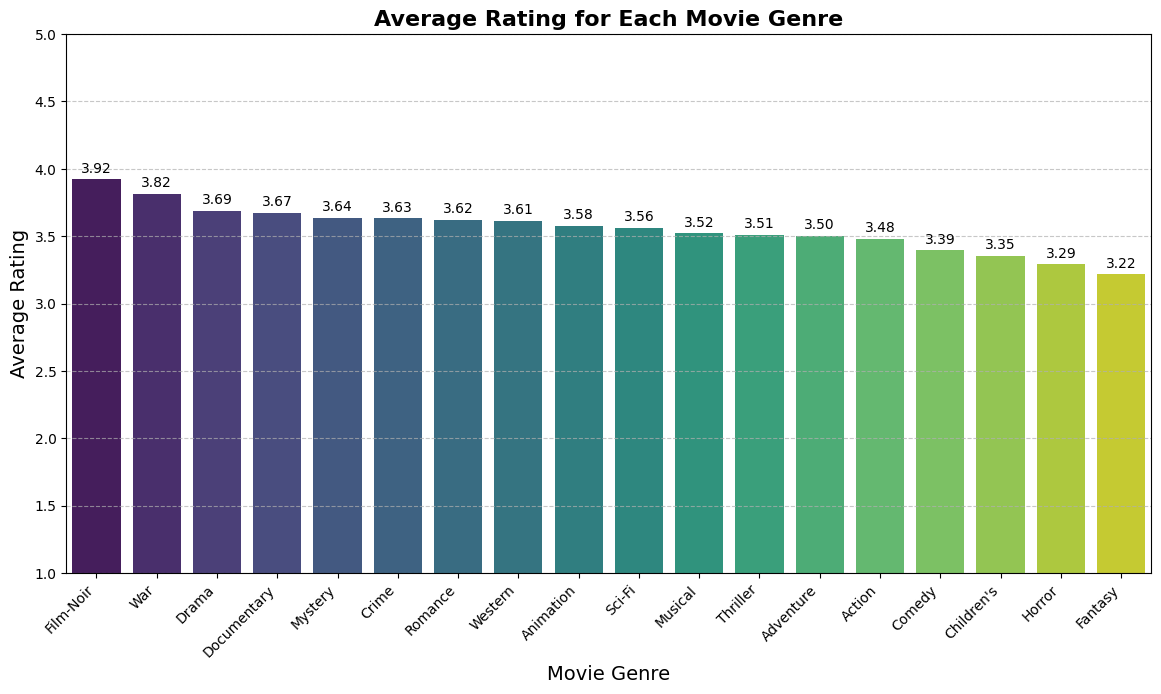

In [ ]:
sorted_genre_ratings = dict(sorted(genre_ratings.items(), key=lambda item: item[1], reverse=True))

# Creating a bar plot
plt.figure(figsize=(14, 7))
sns.barplot(x=list(sorted_genre_ratings.keys()), y=list(sorted_genre_ratings.values()),
            hue=list(sorted_genre_ratings.keys()), palette='viridis', dodge=False, legend=False)

plt.ylim(1, 5)

# Adding data labels on top of each bar
for index, value in enumerate(sorted_genre_ratings.values()):
    plt.text(index, value + 0.03, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Average Rating for Each Movie Genre', fontsize=16, weight='bold')
plt.xlabel('Movie Genre', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)

plt.xticks(rotation=45, ha='right') # Rotating x-axis
plt.grid(axis='y', linestyle='--', alpha=0.7) # Adding gridlines
plt.show()

# 2. Which genres are the most popular based on the number of ratings received?

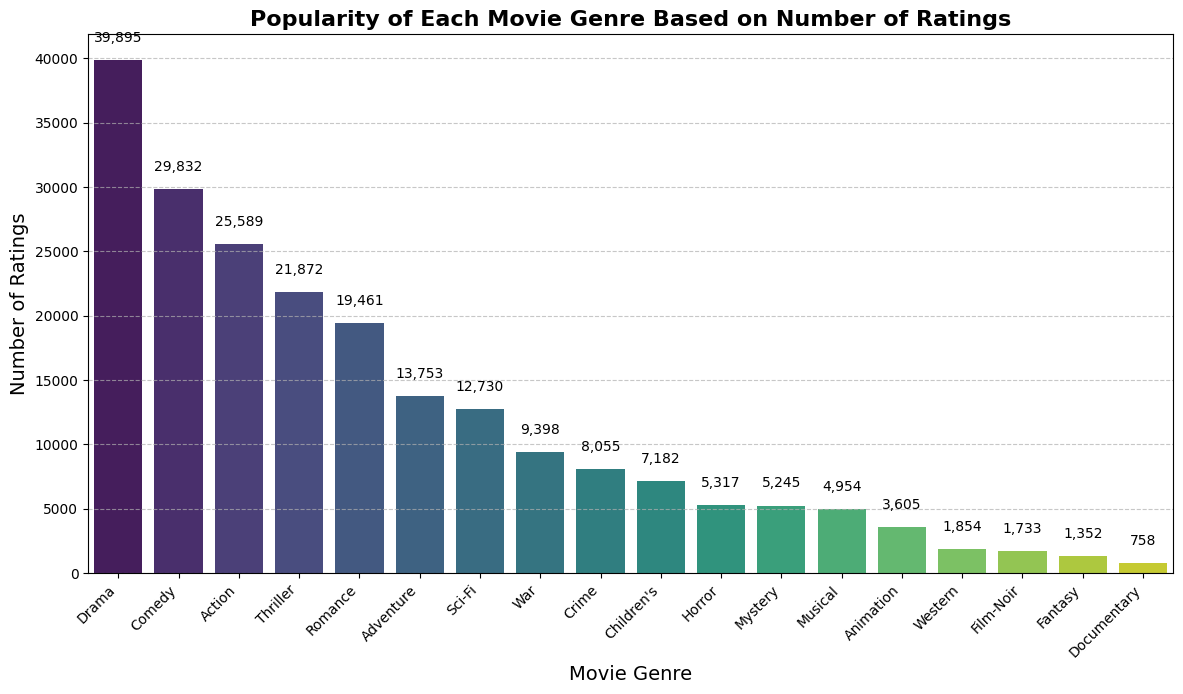

In [ ]:
# Counting the number of ratings per genre
genre_popularity = {}
for genre in genres:
    genre_popularity[genre] = merged_df[merged_df[genre] == 1].shape[0]

# Sorting the genre popularity dictionary by the number of ratings
sorted_genre_popularity = dict(sorted(genre_popularity.items(), key=lambda item: item[1], reverse=True))

# Creating a bar plot for genre popularity
plt.figure(figsize=(14, 7))
sns.barplot(x=list(sorted_genre_popularity.keys()), y=list(sorted_genre_popularity.values()),
            hue=list(sorted_genre_popularity.keys()), palette='viridis', dodge=False, legend=False)

# Adding data labels on top of each bar
for index, value in enumerate(sorted_genre_popularity.values()):
    plt.text(index, value + 0.03 * max(sorted_genre_popularity.values()), f'{value:,}', ha='center', va='bottom', fontsize=10)

# Adding title and labels
plt.title('Popularity of Each Movie Genre Based on Number of Ratings', fontsize=16, weight='bold')
plt.xlabel('Movie Genre', fontsize=14)
plt.ylabel('Number of Ratings', fontsize=14)

plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 3. Which movies (Top-10) have received the highest number of ratings?

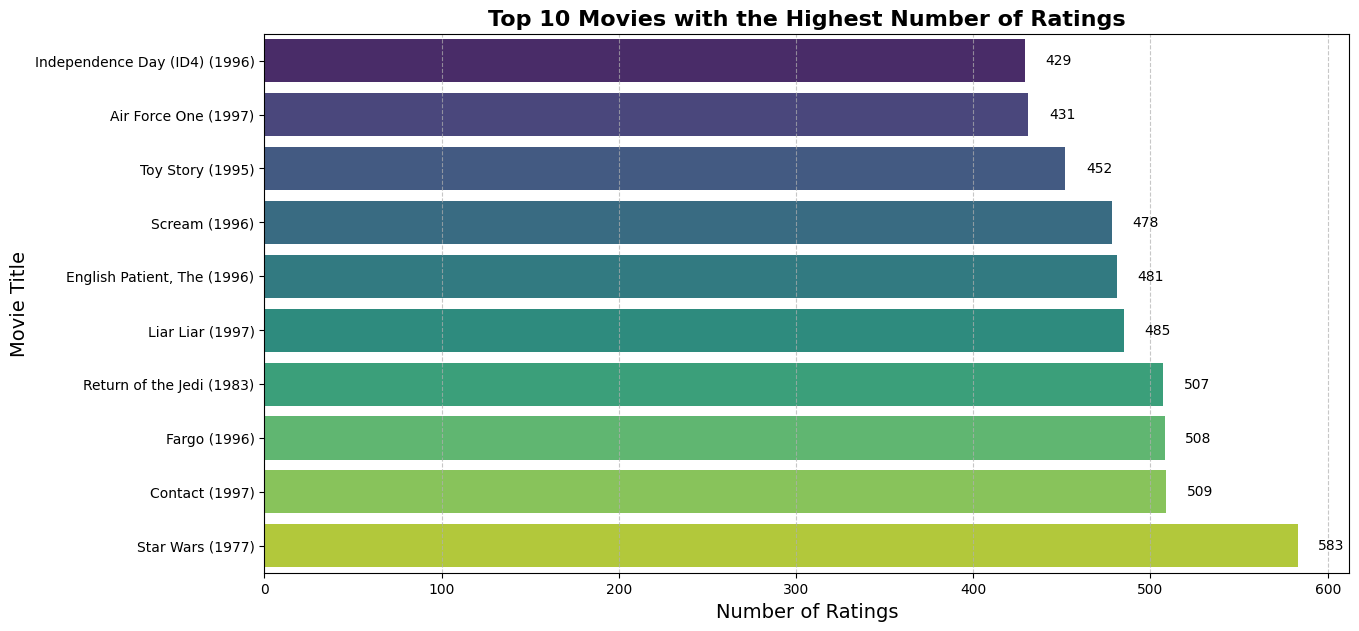

In [ ]:
top_10_movies = merged_df['title'].value_counts().head(10).sort_values(ascending=True)

# Creating the bar plot
plt.figure(figsize=(14, 7))
sns.barplot(x=top_10_movies.values, y=top_10_movies.index, hue=top_10_movies.index, palette='viridis', dodge=False, legend=False)

# Adding data labels
for index, value in enumerate(top_10_movies.values):
    plt.text(value + 0.02 * max(top_10_movies.values), index, f'{value:,}', ha='left', va='center', fontsize=10)

# Title and labels
plt.title('Top 10 Movies with the Highest Number of Ratings', fontsize=16, weight='bold')
plt.xlabel('Number of Ratings', fontsize=14)
plt.ylabel('Movie Title', fontsize=14)

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# 4. Are there any significant differences in the preferences for different movie genres between male and female users?

<Figure size 1400x700 with 0 Axes>

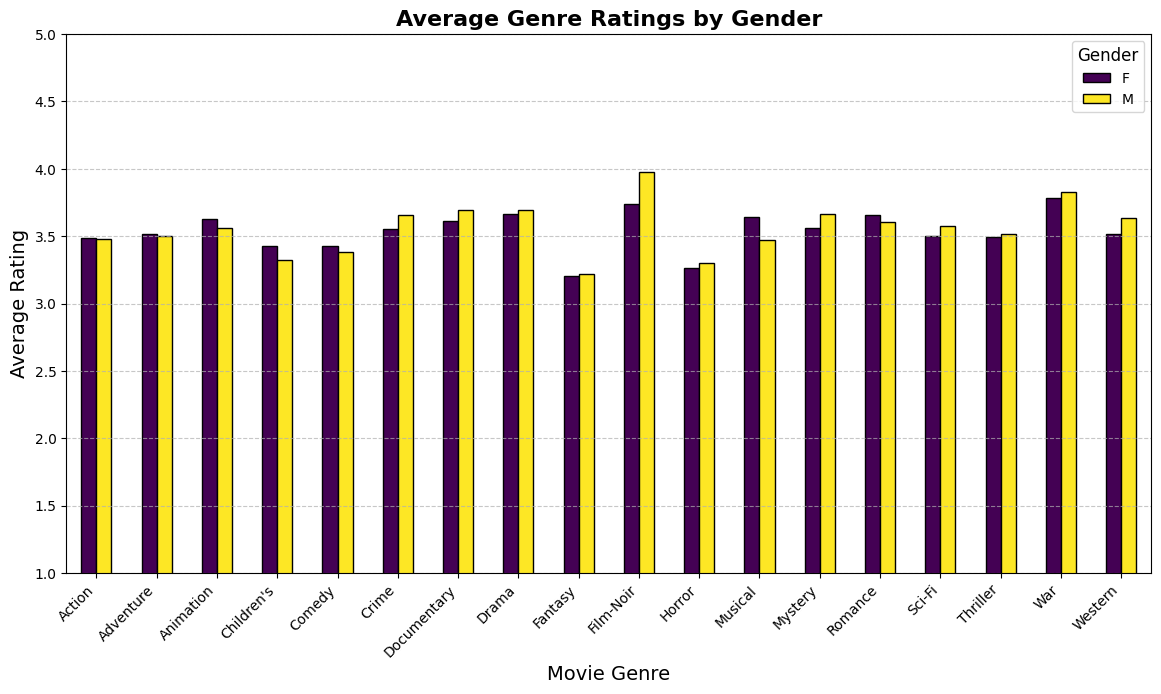

In [ ]:
# Calculating average ratings
genre_gender_ratings = {genre: merged_df[merged_df[genre] == 1].groupby('gender')['rating'].mean() for genre in genres}

# Creating a DataFrame for the grouped bar plot
gender_df = pd.DataFrame(genre_gender_ratings).T.sort_index(ascending=True)

# Plotting
plt.figure(figsize=(14, 7))
gender_df.plot(kind='bar', figsize=(14, 7), colormap='viridis', edgecolor='black')
plt.ylim(1, 5)

plt.title('Average Genre Ratings by Gender', fontsize=16, weight='bold')
plt.ylabel('Average Rating', fontsize=14)
plt.xlabel('Movie Genre', fontsize=14)

plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Gender', title_fontsize=12, fontsize=10)
plt.show()

# 5. Do male or female users rate more movies on average?

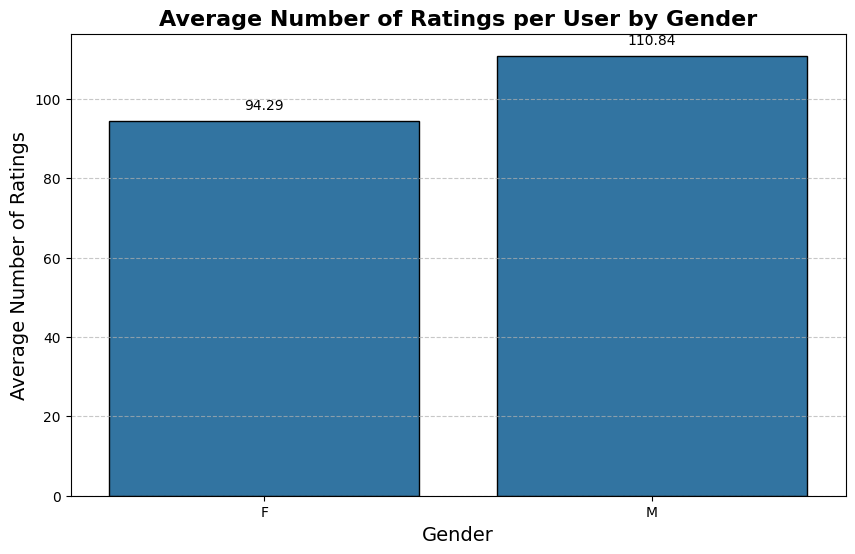

In [ ]:
# Creating a bar plot
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=average_ratings_by_gender.index, y=average_ratings_by_gender.values, edgecolor='black')

# Adding data labels on the bars
for bar in bars.patches:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X position
        height + 0.02 * max(average_ratings_by_gender.values),  # Y position
        f'{height:.2f}',  # Label
        ha='center',  # Horizontal alignment
        va='bottom',  # Vertical alignment
        fontsize=10
    )

plt.title('Average Number of Ratings per User by Gender', fontsize=16, weight='bold')
plt.ylabel('Average Number of Ratings', fontsize=14)
plt.xlabel('Gender', fontsize=14)

# Adding gridlines for better comparison
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# 6. Which movies have the highest average ratings within each genre?

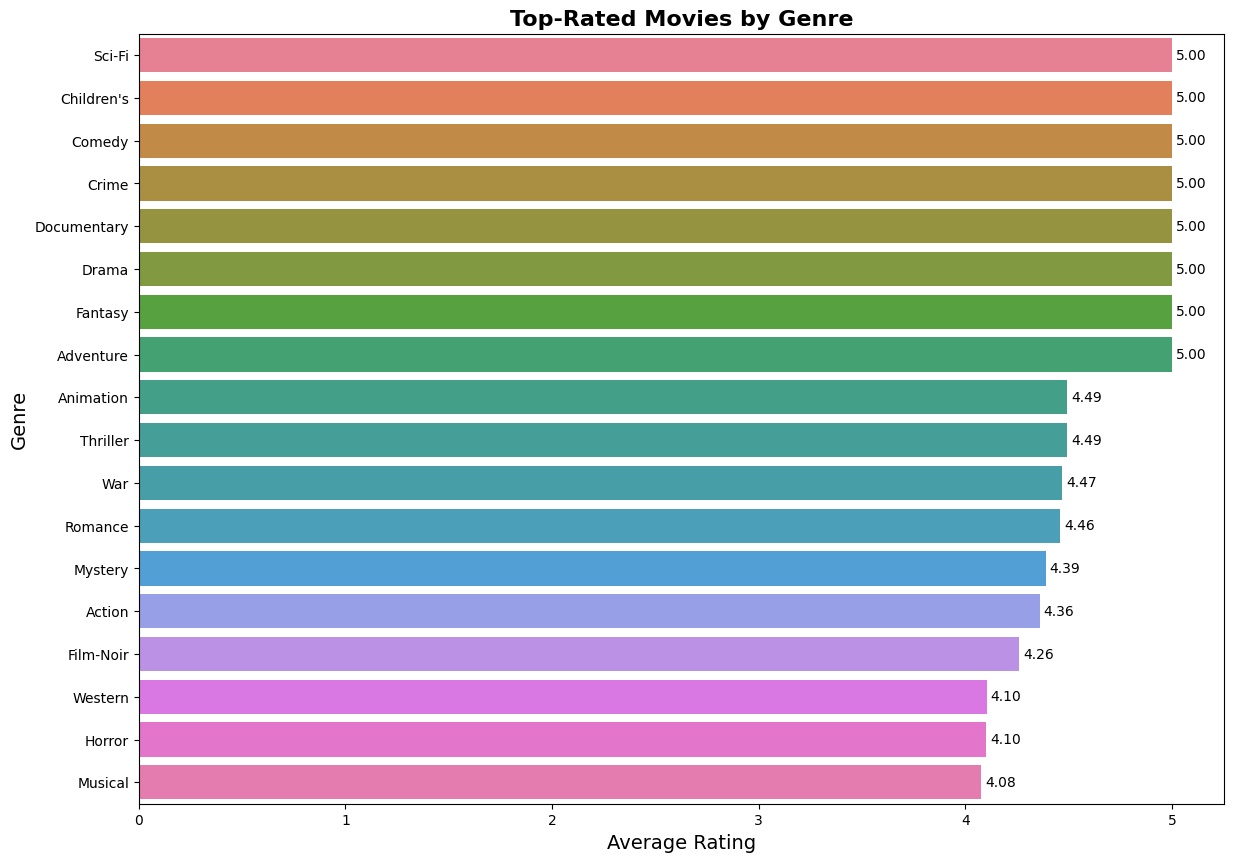

In [ ]:
# Create a dictionary to store top-rated movies for each genre
top_movies_by_genre = {}

# Iterate over each genre
for genre in genres:
    genre_movies = merged_df[merged_df[genre] == 1]
    average_ratings = genre_movies.groupby('title')['rating'].mean()
    top_movie = average_ratings.idxmax()
    top_rating = average_ratings.max()
    top_movies_by_genre[genre] = {'Top Movie': top_movie, 'Average Rating': top_rating}

# dictionary to a DataFrame
top_movies_by_genre_df = pd.DataFrame(top_movies_by_genre).T

# Sort the DataFrame to ensure proper visualization
top_movies_by_genre_df = top_movies_by_genre_df.sort_values(by='Average Rating', ascending=False)

# bar plot
plt.figure(figsize=(14, 10))
sns.barplot(x='Average Rating', y=top_movies_by_genre_df.index, data=top_movies_by_genre_df,
            hue=top_movies_by_genre_df.index, palette='husl', dodge=False, legend=False)

# Adding data labels
for index, value in enumerate(top_movies_by_genre_df['Average Rating']):
    plt.text(value + 0.02, index, f'{value:.2f}', va='center', fontsize=10)

plt.title('Top-Rated Movies by Genre', fontsize=16, weight='bold')
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Genre', fontsize=14)

plt.show()

# 7. How do ratings vary across different user age groups?

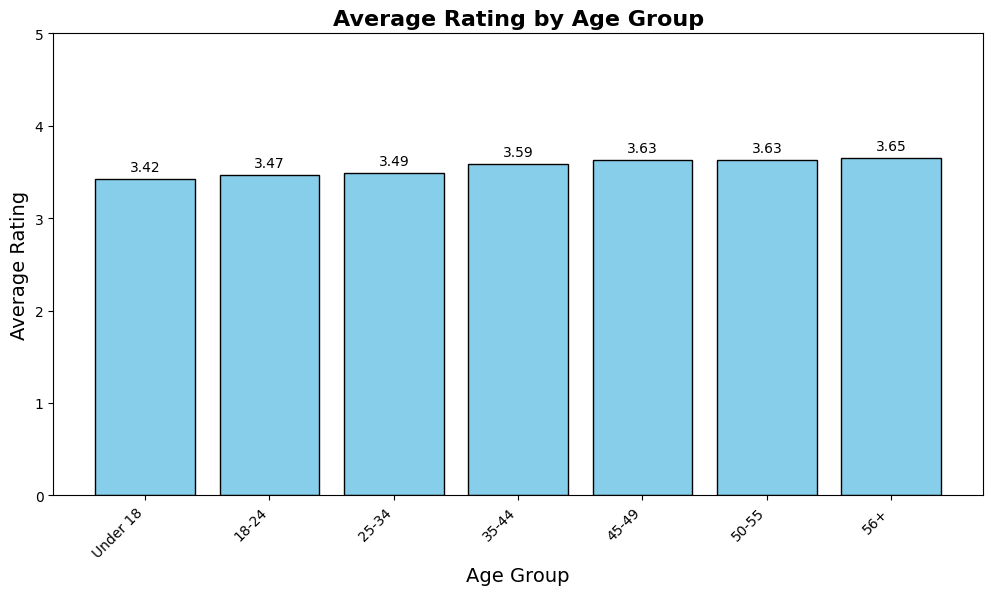

In [ ]:
# Defining age bins and labels
bins = [0, 18, 25, 35, 45, 50, 56, 100]
labels = ['Under 18', '18-24', '25-34', '35-44', '45-49', '50-55', '56+']
merged_df['age_group'] = pd.cut(merged_df['age'], bins=bins, labels=labels, right=False)

average_ratings_by_age_group = merged_df.groupby('age_group', observed=False)['rating'].mean().sort_index()

# bar plot
plt.figure(figsize=(12, 6))
plt.bar(average_ratings_by_age_group.index, average_ratings_by_age_group.values, color='skyblue', edgecolor='black')

# Adding data labels
for index, value in enumerate(average_ratings_by_age_group.values):
    plt.text(index, value + 0.05, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Average Rating by Age Group', fontsize=16, weight='bold')
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Setting y-axis limit to match expected rating range
plt.ylim(0, 5)

plt.show()

# 8. How do ratings vary across different user occupations?

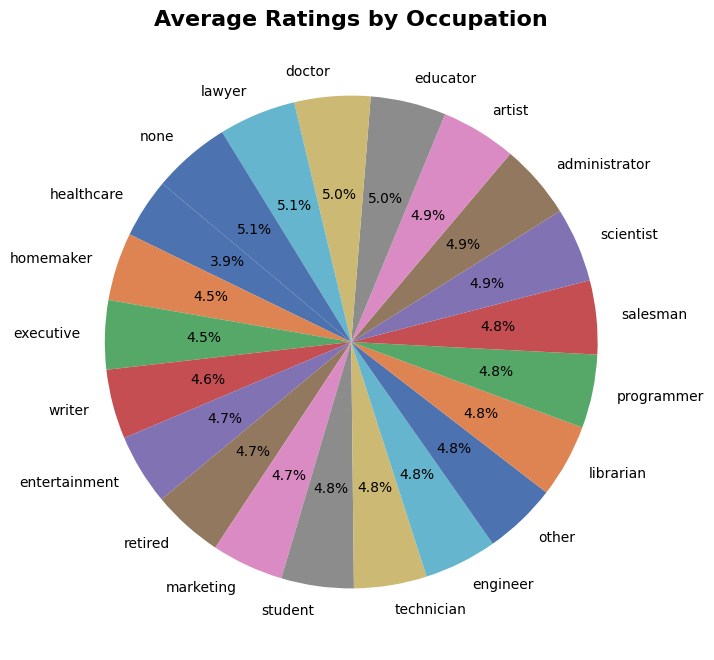

In [ ]:
# average ratings by occupation
occupation_ratings = merged_df.groupby('occupation')['rating'].mean().sort_values()

# Creating a pie chart
plt.figure(figsize=(12, 8))

plt.pie(occupation_ratings, labels=occupation_ratings.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("deep"))
plt.title('Average Ratings by Occupation', fontsize=16, weight='bold')
plt.show()

# 9. Which genres are preferred by different age groups?

<Figure size 1400x800 with 0 Axes>

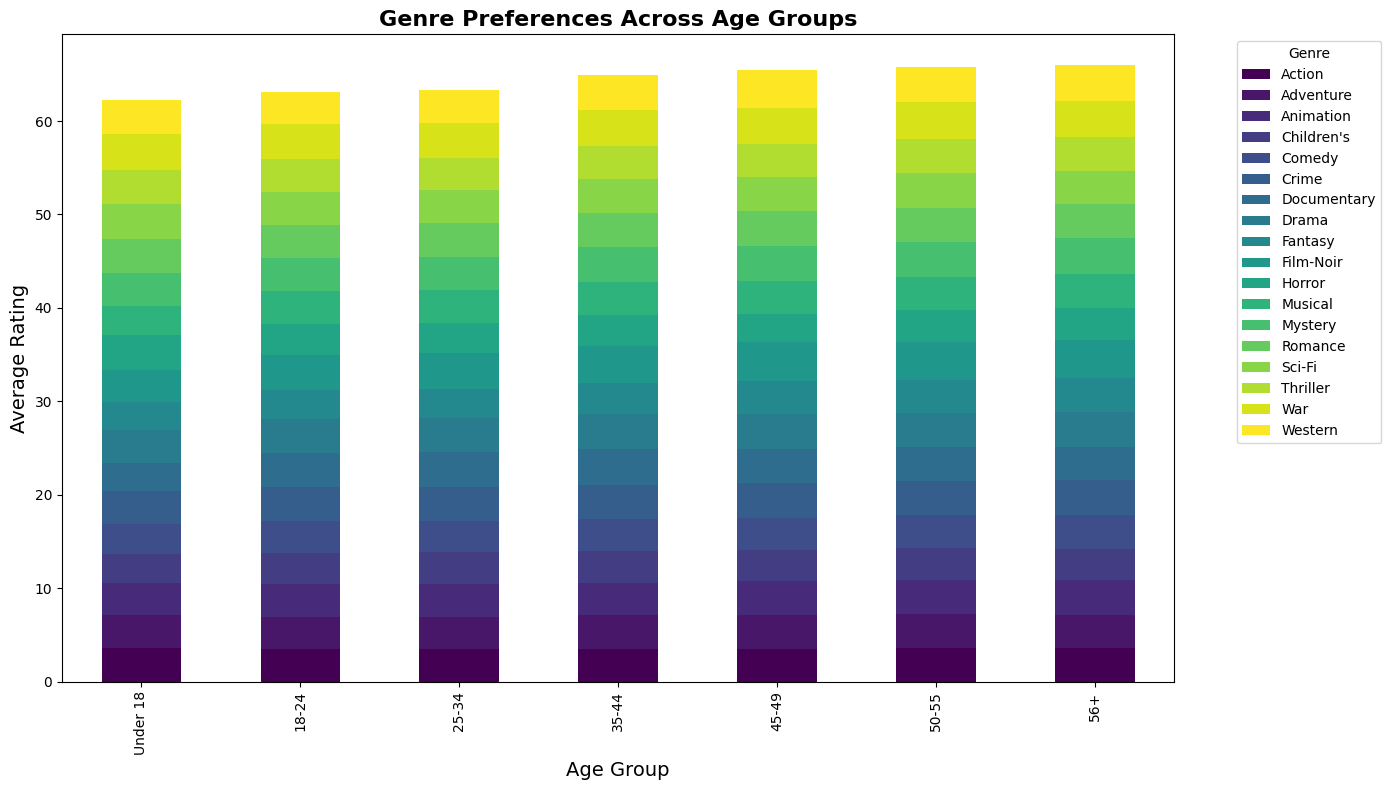

In [ ]:
# Calculating average genre ratings by age group
genre_age_preferences = {}
for genre in genres:
    genre_age_preferences[genre] = merged_df[merged_df[genre] == 1].groupby('age_group', observed=False)['rating'].mean()

# Converting dictionary to a DataFrame
genre_age_df = pd.DataFrame(genre_age_preferences).fillna(0)

# stacked bar chart
plt.figure(figsize=(14, 8))
genre_age_df.plot(kind='bar', stacked=True, colormap='viridis', figsize=(14, 8))

# Title and labels
plt.title('Genre Preferences Across Age Groups', fontsize=16, weight='bold')
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)

# Adding legend outside the plot
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# 10. How do user preferences evolve over time? Can we observe any shifts in genre popularity?

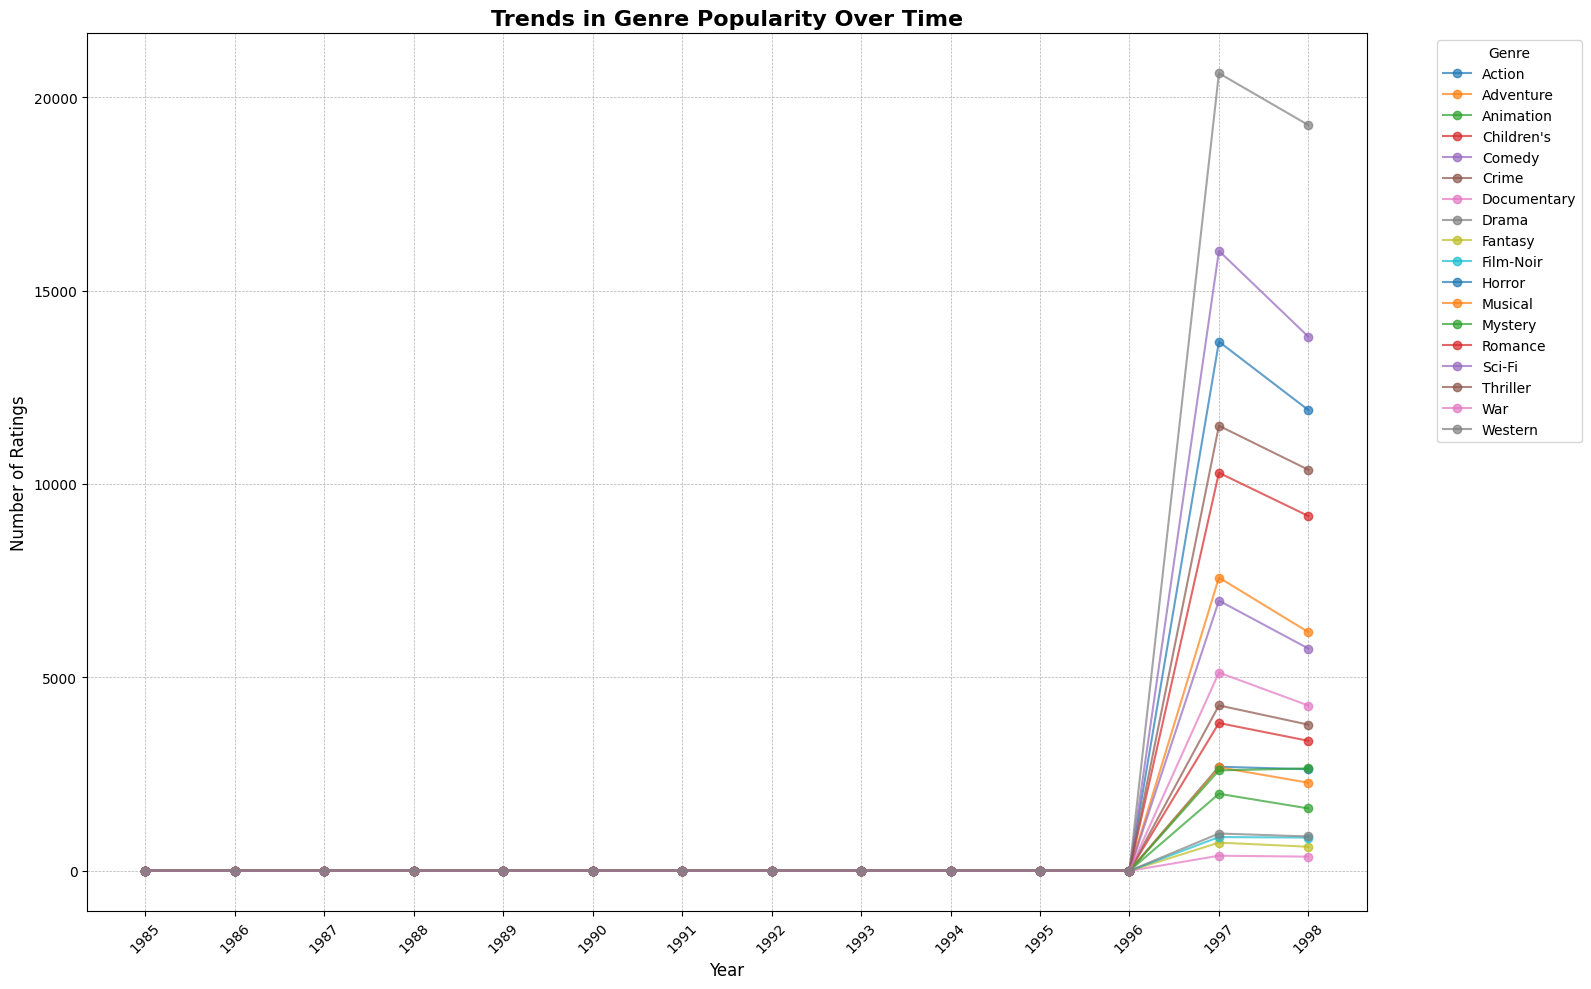

In [ ]:
#  timestamp to datetime
merged_df['timestamp'] = pd.to_datetime(merged_df['timestamp'], unit='s')

# year from timestamp
merged_df['year'] = merged_df['timestamp'].dt.year

genres = ['Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
          'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# Initialize a dictionary to store the counts
genre_year_counts = {genre: merged_df[merged_df[genre] == 1].groupby('year').size() for genre in genres}

# Convert the dictionary to a DataFrame
genre_year_df = pd.DataFrame(genre_year_counts).fillna(0)

# Set the range of years for the x-axis
start_year = 1985
end_year = genre_year_df.index.max()
all_years = list(range(start_year, end_year + 1))

genre_year_df = genre_year_df.reindex(all_years, fill_value=0)
plt.figure(figsize=(16, 10))

# Plot each genre with a line
for genre in genres:
    plt.plot(genre_year_df.index, genre_year_df[genre], label=genre, marker='o', linestyle='-', alpha=0.7)

plt.title('Trends in Genre Popularity Over Time', fontsize=16, weight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Ratings', fontsize=12)
plt.xticks(range(start_year, end_year + 1), rotation=45)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()